In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import random
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import RFECV

from sklearn.impute import SimpleImputer, KNNImputer

from Functions_Classes import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

from feature_engine.encoding import CountFrequencyEncoder

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
np.random.seed(0)

In [2]:
df = pd.read_excel("C:/Users/Cagan Deliktas/Desktop/ProjectDataMining2/DM2_DataCraft/data/training_data.xls")
X_test_compete = pd.read_excel("C:/Users/Cagan Deliktas/Desktop/ProjectDataMining2/DM2_DataCraft/data/test_data_no_target.xls")

df = df.loc[:, df.columns != 'Perform']

df_x = df.loc[:, df.columns != 'Class']
df_y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,shuffle=True, random_state=0)

In [3]:
numeric_columns = X_train.loc[:, ~X_train.columns.isin(['Group'])].columns.to_list()
X_train[numeric_columns] = X_train[numeric_columns].replace(
    {
        'NA': np.nan, 
        '': np.nan,
        ' ': np.nan
    }
).astype(float)

X_test[numeric_columns] = X_test[numeric_columns].replace(
    {
        'NA': np.nan, 
        '': np.nan,
        ' ': np.nan
    }
).astype(float)

In [4]:
X_train.head()

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32,I33,I34,I35,I36,I37,I38,I39,I40,I41,I42,I43,I44,I45,I46,I47,I48,I49,I50,I51,I52,I53,I54,I55,I56,I57,I58,dI1,dI2,dI3,dI4,dI5,dI6,dI7,dI8,dI9,dI10,dI11,dI12,dI13,dI14,dI15,dI16,dI17,dI18,dI19,dI20,dI21,dI22,dI23,dI24,dI25,dI26,dI27,dI28,dI29,dI30,dI31,dI32,dI33,dI34,dI35,dI36,dI37,dI38,dI39,dI40,dI41,dI42,dI43,dI44,dI45,dI46,dI47,dI48,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
1001,G5,0.339901,-0.027090,-0.038183,-0.034894,-0.129739,0.023217,-0.176605,-0.045379,0.309218,-0.020941,0.316883,-0.429229,-0.039442,-0.300570,0.031573,-0.243882,-0.104141,-0.045089,-0.079767,0.052063,-0.127503,-0.116164,-0.081128,-0.066821,0.057271,-0.072791,0.713720,-0.157765,-0.082342,-0.018785,-0.166952,-0.004981,0.062033,0.062133,-0.237783,-0.013891,-0.327838,0.038521,-0.007864,-0.064871,-0.052786,-0.058747,-0.135570,0.089810,-0.711503,-0.064696,-0.466000,-0.313633,-0.613122,-0.631239,-0.805312,-0.351338,-0.085776,-0.497588,-0.692350,-0.562542,0.041910,-0.016354,0.010755,0.001424,0.002607,0.043410,0.029651,-0.007953,0.010559,0.002893,0.084324,0.001083,0.142741,-0.350074,0.001747,0.156097,-0.202596,-0.026362,0.004358,-0.000342,0.012561,-0.047178,0.003102,0.002239,0.001686,0.001928,0.027067,0.066567,0.183923,0.004980,0.007886,0.005248,0.074056,-0.017828,0.046981,0.046482,0.046121,-0.014443,-0.007524,0.022292,0.004008,0.065736,-0.042020,-0.040750,0.171417,0.010829,-0.083443,0.351001,-0.014556,-0.040227,-0.274504,-0.245394,-0.398500,-0.098195,0.016469,0.214315,0.019285,-0.098405,-0.027059,0.002613
7360,G8,0.060507,-0.019765,-0.035082,-0.343901,-1.251671,-0.143826,-0.361381,-0.054660,-0.917349,-0.009047,0.025156,-0.747520,-0.065075,-0.715291,-0.898384,-0.213733,-0.029949,-0.046995,0.037750,-0.398438,-0.219984,-0.169016,-0.133886,-0.127145,-0.423685,0.934234,-1.015760,-0.155468,-0.080270,-0.017755,-0.047808,-0.059389,0.231319,0.229621,-0.064934,0.308226,0.010517,-0.036450,-0.020499,-0.067800,0.107171,0.039978,-0.166495,0.004272,0.761372,0.980511,-0.628000,0.529058,-0.306727,-0.341064,0.092000,-0.525532,-0.008640,0.481887,-0.083976,-0.566475,-0.483733,0.012824,0.349321,0.008012,0.000996,0.079583,-0.350336,-0.099390,-0.156289,-0.006645,-0.244872,0.012778,0.190468,-1.274220,-0.027382,0.007558,-0.144551,-0.034057,-0.014673,-0.000209,-0.018989,0.114891,-0.002929,0.009007,0.000585,0.000669,0.061622,0.032263,0.023778,0.036839,0.003085,0.003307,0.010621,-0.022424,-0.015289,-0.015127,-0.035716,0.310548,0.271682,-0.047071,0.005356,0.031021,0.143232,0.108321,-0.072428,-0.177576,0.196806,0.198187,-0.072222,0.262585,0.002079,-0.037908,0.070312,-0.036286,0.006220,0.043591,-0.013493,-0.097193,-0.102039,0.028013
5234,G2,0.086313,-0.010992,-0.012106,-0.434803,-0.061325,-0.123946,-0.144832,-0.013103,0.260357,0.011785,0.401126,0.014261,-0.107297,-0.284234,-0.468111,-0.242772,-0.122882,-0.044571,-0.117181,-0.290714,0.174885,0.040540,-0.018167,0.001006,-0.035097,-0.341259,1.221431,-0.429968,-0.191915,-0.094166,-0.819421,0.441783,0.007249,0.007931,-0.159149,-0.119148,-0.286449,-0.190721,-0.093747,-0.796925,0.935811,0.899968,-0.258627,-0.165092,-0.996623,0.583204,-0.401333,-0.794216,-0.950403,-0.834431,-1.699563,-0.413961,-0.098455,0.710961,-1.011674,-0.018991,-0.142281,-0.058202,-0.058614,-0.009804,-0.018869,-0.099054,0.039110,-0.075024,-0.037489,-0.017748,-0.139300,-0.016723,-0.343602,0.348050,0.008517,0.026425,-0.032539,0.019391,0.000904,-0.000602,-0.002395,0.016662,0.001178,-0.022583,0.003072,0.027286,-0.005873,-0.013298,0.185785,-0.010103,0.005493,0.002136,-0.017115,-0.118150,-0.274184,-0.271271,-0.218582,-0.037907,-0.015908,-0.004291,0.002191,-0.018740,0.019837,0.019237,0.273718,-0.160730,-0.129493,-0.240139,0.186333,0.043911,-0.019986,-0.042642,0.046750,0.089260,-0.013772,-0.189302,-0.045592,0.225644,-0.006541,0.000029
7390,G5,-0.255256,-0.030937,-0.037035,0.007486,-0.159601,-0.352192,-0.625296,-0.046568,-0.341165,-0.034231,-0.183508,0.45954

## Shape

In [5]:
X_train.shape

(6400, 117)

# Only the two columns below have a different type:

In [6]:
X_train.dtypes[X_train.dtypes!='float64']

Group    object
dtype: object

## we can conclude that all of the columns are float64 besides the group and class

In [7]:
X_train.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [8]:
X_train.select_dtypes(include='number').describe().T.loc[:,['mean', '50%']].head()

,mean,50%
I1,0.075013,-0.141740
I2,-0.013397,-0.029600
I3,-0.020962,-0.038703
I4,0.001090,-0.248822
I5,-0.003963,-0.077468


### It seems that the difference between median and mean values for each feature are not so high (not very skewed). the max difference is: 

In [9]:
X_train.select_dtypes(include='number').describe().T.loc[:,['mean', '50%']].assign(diff=lambda x: x['mean'] - x['50%'])['diff'].max()

0.2939161958064032

# we can see that some of the columns' max and min values are extreme. it might indicate outliers

In [10]:
X_train.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
I1,6400.0,0.075013,0.910312,-2.432857,-0.591216,-0.141740,0.494733,5.013767
I2,6400.0,-0.013397,0.194697,-0.076729,-0.036865,-0.029600,-0.017510,9.338686
I3,6400.0,-0.020962,0.212517,-0.060707,-0.046038,-0.038703,-0.027389,9.323656
I4,5996.0,0.001090,0.937334,-1.038730,-0.572480,-0.248822,0.282852,10.504271
I5,6395.0,-0.003963,1.021842,-15.806570,-0.190665,-0.077468,0.072210,22.755955
...,...,...,...,...,...,...,...,...
dI54,6400.0,0.011004,0.290574,-2.753721,-0.118378,0.005360,0.127927,1.676064
dI55,6272.0,0.015606,0.403970,-2.345764,-0.176970,-0.016946,0.165380,3.325363
dI56,6384.0,0.008597,0.498089,-5.744188,-0.150448,-0.022875,0.126711,8.336605
dI57,6291.0,0.007372,1.449936,-79.799539,-0.031728,0.000532,0.036795,71.825953


# Missing Value Percentages for each column in descending order

In [11]:
((pd.DataFrame(
    X_train.isna().sum()
).rename(columns={0: 'missing_perc'}).
  sort_values(['missing_perc'], ascending=False) / X_train.shape[0])*100).head(8)

,missing_perc
dI21,19.390625
I21,19.234375
dI50,19.234375
dI48,19.234375
I48,19.109375
I50,19.109375
dI24,9.171875
I24,8.843750


## The Target Class seems not balanced. The class 0 is way less than other two classes.

In [12]:
y_train.value_counts() #buy or hold or sell

Class
 1    2994
-1    2477
 0     929
Name: count, dtype: int64

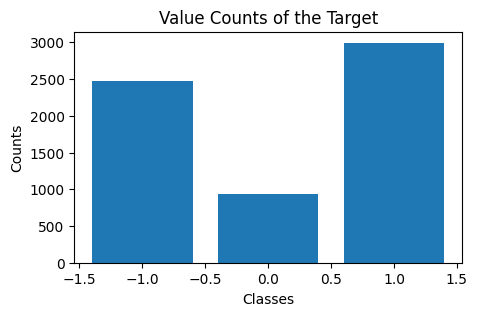

In [13]:
bar_plot = pd.DataFrame(y_train.value_counts()).reset_index()

plt.figure(figsize=(5,3))
plt.bar(x=bar_plot['Class'], height=bar_plot['count'])
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Value Counts of the Target')
plt.show()

## There are many highly correlated columns

In [14]:
correlation_matrix = X_train.loc[:, ~X_train.columns.isin(['Group'])].corr()

high_correlation_pairs = (correlation_matrix.abs() > 0.9) & (correlation_matrix != 1)

pairs = [(col1, col2, round(correlation_matrix.loc[col1, col2],4)) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if high_correlation_pairs.loc[col1, col2]]

print("Pairs with correlation greater than 0.6:")
print(pairs[:5])

Pairs with correlation greater than 0.6:
[('I2', 'I3', 0.9848), ('I2', 'I8', 0.9766), ('I2', 'I10', 0.9348), ('I3', 'I2', 0.9848), ('I3', 'I8', 0.986)]


## Model Selection Class

# Classification Models

In [15]:
voting_estimators = [
    ('RandomForest', RandomForestClassifier(random_state=0)),
    ('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0, probability=True)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(random_state=0, solver="saga")),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    ('NeuralNetwork', MLPClassifier(random_state=0)) #hidden_layer_sizes=(20,20) for 2 hidden layers with 20 neurons each
]

vote_model = VotingClassifier(
    estimators=voting_estimators, 
    voting='soft'
)

stacking_estimators = [
    ('RandomForest', RandomForestClassifier(random_state=0)),
    ('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0, probability=True)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    ('NeuralNetwork', MLPClassifier(random_state=0))
]
meta_stack_classifier = LogisticRegression(random_state=0, solver="saga")

stacking_model = StackingClassifier(
    estimators=stacking_estimators, 
    final_estimator=meta_stack_classifier, 
    cv=5
)

estimators = [
    #('RandomForest', RandomForestClassifier(random_state=0)),
    #('DecisionTree', DecisionTreeClassifier(random_state=0)),
    #('SVM', SVC(random_state=0, probability=True)),
    #('NaiveBayes', GaussianNB()),
    #('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(random_state=0, solver="saga")),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    #('AdaBoost', AdaBoostClassifier(random_state=0)),
    #('Voting', vote_model),
    #('Stacking', stacking_model),
    #('NeuralNetwork', MLPClassifier(random_state=0)) # 2 hidden layers with 20 neurons each
]

# Create Pipeline with different combination of preprocessing steps

## Combination 1

In [16]:
c1_objs = dict()
####################################### 
X_train_ohe, ohe_encoder = apply_one_hot_encoding(X_train, 'Group')
c1_objs['ohe'] = ohe_encoder
#######################################
X_train_ohe_simpmiss, simp_imp = handle_missing_vals_simple(X_train_ohe, strategy='median')
c1_objs['miss'] = simp_imp
#######################################
X_train_ohe_simpmiss_df = pd.concat([X_train_ohe_simpmiss.reset_index(drop=True), pd.Series(y_train, name='Class').reset_index(drop=True)], axis=1)

X_train_ohe_simpmiss_lof_df, lof_obj = detect_outliers_with_lof(X_train_ohe_simpmiss_df, n_neighbors=20)
c1_objs['lof'] = lof_obj

X_train_ohe_simpmiss_lof = X_train_ohe_simpmiss_lof_df.loc[:, X_train_ohe_simpmiss_lof_df.columns != 'Class']
y_train_lof = X_train_ohe_simpmiss_lof_df['Class']
#######################################
X_train_ohe_simpmiss_lof_smote, y_train_lof_smote = apply_smote(X_train_ohe_simpmiss_lof, y_train_lof)
#######################################

In [ ]:
#now, continue with standard scaler and rfecv

In [ ]:
X_train_ohe_simpmiss_lof_smote

In [28]:
pd.DataFrame(StandardScaler().fit_transform(
    X_train_ohe_simpmiss_lof_smote.loc[:, ~X_train_ohe_simpmiss_lof_smote.columns.str.contains('Group')]), columns=X_train_ohe_simpmiss_lof_smote.loc[:, ~X_train_ohe_simpmiss_lof_smote.columns.str.contains('Group')].columns
            )

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32,I33,I34,I35,I36,I37,I38,I39,I40,I41,I42,I43,I44,I45,I46,I47,I48,I49,I50,I51,I52,I53,I54,I55,I56,I57,I58,dI1,dI2,dI3,dI4,dI5,dI6,dI7,dI8,dI9,dI10,dI11,dI12,dI13,dI14,dI15,dI16,dI17,dI18,dI19,dI20,dI21,dI22,dI23,dI24,dI25,dI26,dI27,dI28,dI29,dI30,dI31,dI32,dI33,dI34,dI35,dI36,dI37,dI38,dI39,dI40,dI41,dI42,dI43,dI44,dI45,dI46,dI47,dI48,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,0.291900,-0.132622,-0.157683,-0.013106,-0.160961,0.001292,-0.212350,-0.172894,0.352716,-0.150603,0.351881,-0.632138,-0.059804,-0.296041,0.028124,-0.218841,-0.496539,-0.068610,-0.296520,0.059878,-0.208924,-0.180140,-0.085955,-0.059398,0.054459,-0.220831,0.706891,-0.133330,-0.241321,0.033615,-0.185184,-0.011128,0.011957,0.011957,-0.283760,-0.170113,-0.486489,0.459256,0.171162,-0.072527,-0.386671,-0.383828,-0.165095,0.233407,-0.703365,-0.032534,-0.384860,-0.317893,-0.636720,-0.667729,-0.816688,-0.311406,-0.254934,-0.540319,-0.750529,-0.554752,0.278136,0.068396,-0.067043,-0.020318,0.033460,0.166060,0.010449,-0.038240,-0.015490,0.031245,0.139157,-0.033212,0.321989,-0.400058,-0.003859,0.788615,-0.474048,-0.104722,0.062463,-0.014278,0.109334,-0.148825,0.090303,0.048289,0.033955,0.041964,0.234913,0.568989,0.687304,0.055990,0.051501,0.109866,0.134590,-0.137055,0.054682,0.054682,0.079046,-0.150991,-0.152952,0.213613,0.066372,0.091078,-0.166460,-0.151665,0.355825,-0.003118,-0.213502,1.218309,0.006486,-0.282897,-0.544958,-0.456664,-0.997362,-0.156597,0.100224,0.806887,0.021426,-0.235338,-0.145370,0.009614
1,-0.036472,0.000008,-0.106459,-0.389365,-1.741123,-0.209841,-0.435367,-0.306825,-0.909554,0.068936,-0.003503,-1.103221,-0.259086,-0.819073,-1.023935,-0.186564,-0.003846,-0.074197,0.218140,-0.476347,-0.482206,-0.345810,-0.178842,-0.155413,-0.458260,2.131484,-1.072024,-0.130708,-0.227772,0.051430,-0.047684,-0.069925,0.208708,0.208708,-0.093282,0.275578,-0.083865,-0.024517,-0.004902,-0.075516,-0.009126,-0.159437,-0.201459,-0.046416,0.871368,1.089039,-0.572549,0.663599,-0.286122,-0.311312,0.153318,-0.505329,0.148387,0.556202,-0.082621,-0.559092,-1.706635,0.570865,0.572875,0.158023,-0.007709,0.284910,-0.460304,-0.181646,-0.260959,-0.174690,-0.445603,0.249641,0.442209,-1.465056,-0.243489,0.075734,-0.336053,-0.134776,-0.198824,-0.013509,-0.206377,0.258108,-0.006776,0.127370,0.025198,0.032930,0.434187,0.282365,0.039085,0.224141,0.020051,0.054164,-0.063421,-0.165799,-0.127186,-0.127186,-0.238501,0.547392,0.523803,-0.404400,0.102009,-0.005495,0.250176,0.151921,-0.259532,-0.506058,0.855753,0.671094,-0.105213,1.713618,0.086201,0.010683,0.316686,-0.043958,0.016489,0.112856,-0.071352,-0.232300,-0.453684,0.395742
2,-0.006142,0.158851,0.272965,-0.500052,-0.064605,-0.184713,-0.174001,0.292898,0.302433,0.453445,0.454506,0.024242,-0.587352,-0.275439,-0.537168,-0.217652,-0.620996,-0.067093,-0.460369,-0.348125,0.684640,0.311066,0.024895,0.048561,-0.044009,-0.847946,1.229115,-0.444049,-0.957777,-1.270348,-0.938171,0.471679,-0.051717,-0.051717,-0.197106,-0.315751,-0.437238,-1.019997,-1.025648,-0.819659,1.946711,1.795232,-0.309798,-0.600454,-1.008202,0.662704,-0.309939,-0.877634,-1.022658,-0.917307,-1.783383,-0.381122,-0.321231,0.812650,-1.101100,0.044828,-0.417348,-0.652253,-0.198156,-0.324256,-0.515552,-0.302028,0.022166,-0.143431,-0.086179,-0.414408,-0.258072,-0.463859,-0.903063,0.404469,0.051828,0.166284,-0.069758,0.073969,0.015044,-0.015778,-0.040321,0.011469,0.059335,-0.241733,0.044970,0.223841,0.044961,-0.098304,0.694841,-0.023618,0.035826,0.020552,-0.149997,-0.764491,-0.883326,-0.883326,-0.948068,-0.201413,-0.173273,-0.023243,0.018319,-0.143924,-0.027342,-0.029499,0.613989,-0.461087,-0.389198,-0.898516,0.395603,0.271847,0.035849,0.000020,0.250642,0.184462,-0.146833,-0.833911,-0.162206,0.576791,-0.061001,-0.029671
3,-0.407588,-0.202268,-0.138713,0.038497,-0.203020,-0.473204,-0.753900,-0.190042,-0.316598,-0.395897,-0.257699,0.683276,0.578203,0.845290,-0.661

## Create X_train and Y_train
## one hot encoded (group). 

In [21]:
X_train = df_ohe_smote_scaled.loc[:, ~df_ohe_smote_scaled.columns.isin(['Class'])]
Y_train = df_ohe_smote_scaled.loc[:, df_ohe_smote_scaled.columns.isin(['Class'])]

# Apply cross validation with f1, auc and accuracy

#### *Weighted F1 Score: F1 score calculated by taking the average of F1 scores for each class. Average is weighted by support which is the number of true instances for each label. 
#### *AUC One vs One Weighted: By considering all pairwise combinations of classes, average AUC is calculated. Average is weighted by the support. 


In [22]:
error_cost_matrix = np.array([[0, 1, 2],
                              [1, 0, 1],
                              [2, 1, 0]])

model_selector = ModelSelection(
    x_train=X_train, 
    y_train=Y_train,
    estimators=estimators
)
model_selector.encode_y_train()
model_selector.create_col_transformer()

In [23]:
model_selector.calculate_cv_f1(n_folds=10, scoring_average='f1_weighted')
print('**********************************************')
model_selector.calculate_cv_auc(n_folds=10, scoring_average='roc_auc_ovo_weighted')
print('**********************************************')   
model_selector.calculate_cv_accuracy(n_folds=10, scoring_average='accuracy')
print('**********************************************')   
#model_selector.calculate_cost_matrix_error_cv(n_folds=3)

CV Results for Mean F1 Score:

LogisticRegression = 0.401707
GradientBoost = 0.508531
XGBoost = 0.631365

Best Estimator (F1): XGBoost
**********************************************
CV Results for Mean AUC Score:

LogisticRegression = 0.576623
GradientBoost = 0.700075
XGBoost = 0.804459

Best Estimator (AUC): XGBoost
**********************************************
CV Results for Mean Accuracy Score:

LogisticRegression = 0.402864
GradientBoost = 0.512646
XGBoost = 0.634375

Best Estimator (Accuracy): XGBoost
**********************************************


In [24]:
model_selector.accuracy_cv_results

{'LogisticRegression': array([0.4173298 , 0.41467728, 0.38815208, 0.42086649, 0.39911504,
        0.40265487, 0.41769912, 0.39734513, 0.3840708 , 0.38672566]),
 'GradientBoost': array([0.52519894, 0.5331565 , 0.51282051, 0.52961981, 0.50884956,
        0.50353982, 0.50973451, 0.48849558, 0.5       , 0.51504425]),
 'XGBoost': array([0.65163572, 0.62068966, 0.63395225, 0.65163572, 0.62477876,
        0.64159292, 0.65044248, 0.61946903, 0.6       , 0.64955752])}